In [1]:
%pylab inline
import os

Populating the interactive namespace from numpy and matplotlib


## Crossover tests

In [25]:
algorithms = ['SSGA', 'GGA', 'PSO', 'DE', 'CMA-ES']
functions = ['BentCigar', 'Schaffers', 'Katsuura']
crossovers = ['Average', 'AverageWeighted', 'CoinFlip', 'CoinFlipWeighted', 'NPoints']

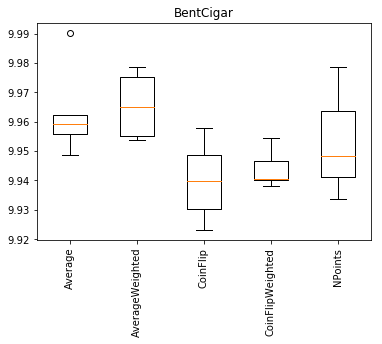

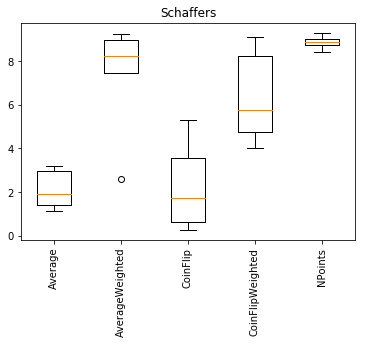

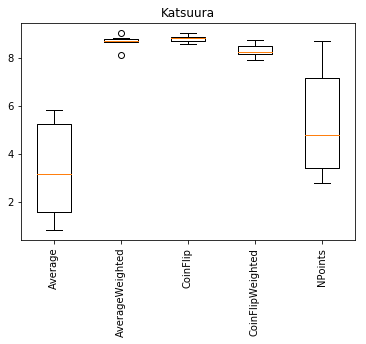

In [26]:
crossover_dir = 'logs/crossoverTests/'
folders = sorted(os.listdir(crossover_dir))

fitness = np.zeros((5, 3, 6))
function = 0
crossover = 0
for folder in folders:
    folder_name = crossover_dir + folder
    with open(folder_name + '/run.log') as f:
        n = 0
        for line in f.readlines():
            line = line.replace('\n', '').split()
            if line[0] == "Score:":
                fitness[crossover, function, n] = (float(line[1]))
                n+=1
    function = (function + 1) % 3
    if function == 0:
        crossover += 1

means = np.mean(fitness, axis=2)
variances = np.var(fitness, axis=2)

axis = np.arange(1, 6)

for index, function in enumerate(functions):
    plt.figure()
    plt.boxplot(np.transpose(fitness[:,index,:]))
    plt.xticks(axis, crossovers, rotation='vertical')
    plt.title(function)

## Results

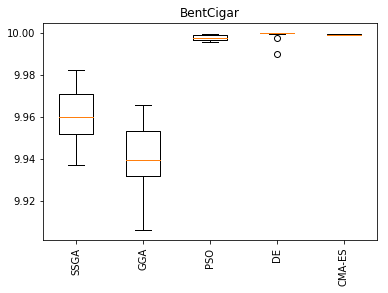

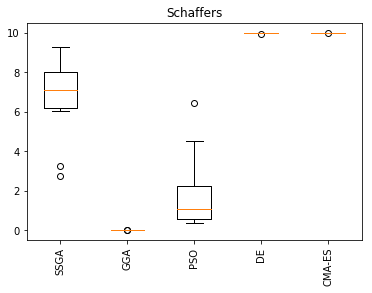

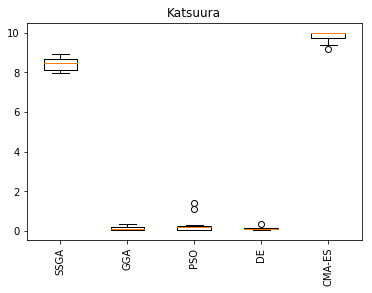

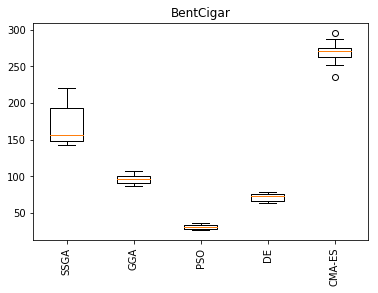

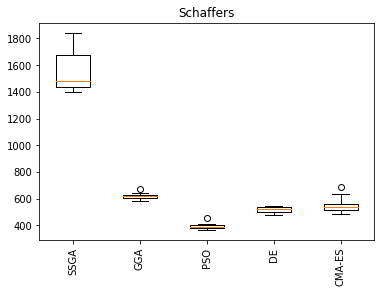

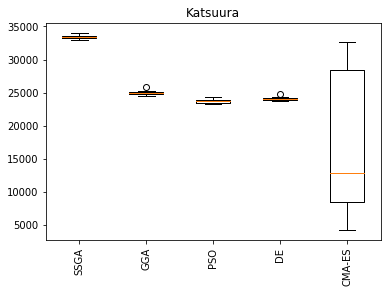

In [23]:
results_dir = 'logs/results/'
folders = sorted(os.listdir(results_dir))

fitness = np.zeros((5, 3, 10))
time = np.zeros((5, 3, 10))
function = 0
algorithm = 0

for folder in folders:
    folder_name = results_dir + folder
    with open(folder_name + '/run.log') as f:
        n = 0
        for line in f.readlines():
            line = line.replace('\n', '').split()
            if line[0] == "Score:":
                fitness[algorithm, function, n] = (float(line[1]))
            elif line[0] == "Runtime:":
                time[algorithm, function, n] = (float(line[1].replace('ms', '')))
                n+=1
    function = (function + 1) % 3
    if function == 0:
        algorithm += 1

fitness_means = np.mean(fitness, axis=2)
fitness_variances = np.var(fitness, axis=2)

time_means = np.mean(time, axis=2)
time_variances = np.var(time, axis=2)

axis = np.arange(1, 6)

for index, function in enumerate(functions):
    plt.figure()
    plt.boxplot(np.transpose(fitness[:,index,:]))
    plt.xticks(axis, algorithms, rotation='vertical')
    plt.title(function)
    
for index, function in enumerate(functions):
    plt.figure()
    plt.boxplot(np.transpose(time[:,index,:]))
    plt.xticks(axis, algorithms, rotation='vertical')
    plt.title(function)